In [1]:
import sys
import os
import pandas as pd
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
from utils.utils import save_experiment, train_and_evaluate_logistic_regression, evaluate_model_on_parquet, grid_search_model
from configs.config_local import DATASET_PATH, DATASET_PATH_FEATURES, ITW_DATASET_PATH, MODELS_PATH


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np


In [2]:
train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_20_128_256_128.parquet")
test_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_features_20_128_256_128.parquet")

In [3]:


df = pd.read_parquet(train_data_path)
df_test = pd.read_parquet(test_data_path)
#print(df.head())
print(df_test.head())
print(df_test.shape)
#df.shape()

lr_params = {
            "C": 10.0,  # Regularization strength
            "class_weight": "balanced",  # Handle imbalanced classes
            "max_iter": 1000,  # Usually enough to converge
            "random_state": 42,
            "solver": "liblinear",  # Good for small-medium datasets, handles binary classification well
            "penalty": "l2",  # Standard L2 regularization
        }

pipeline, metrics, lr_params, feature_names, metadata_extra = train_and_evaluate_logistic_regression(train_data_path, test_data_path, lr_params)

  label                                           filename  mfcc_mean_0  \
0  real    file1.wav_16k.wav_norm.wav_mono.wav_silence.wav  -611.930420   
1  real   file10.wav_16k.wav_norm.wav_mono.wav_silence.wav  -605.008606   
2  real  file100.wav_16k.wav_norm.wav_mono.wav_silence.wav  -597.774414   
3  real  file1000.wav_16k.wav_norm.wav_mono.wav_silence...  -601.991211   
4  real  file1001.wav_16k.wav_norm.wav_mono.wav_silence...  -624.717590   

   mfcc_std_0  mfcc_mean_1  mfcc_std_1  mfcc_mean_2  mfcc_std_2  mfcc_mean_3  \
0   72.226364    12.266665   42.255665   -12.647933   31.396906    22.397125   
1   89.047852    -0.973098   43.327984   -12.821069   30.010666    38.964752   
2   55.831722     7.211399   28.566553   -16.026072   20.905310    50.700493   
3   84.732544   -23.718582   54.874195    -9.058393   29.486805    42.911995   
4   89.558777   -23.051550   46.054176   -12.977422   40.239491    38.695904   

   mfcc_std_3  ...  mel_spectrogram_mean_123  mel_spectrogram_std_12

In [4]:
print(metrics)

{'accuracy': 0.7224859732412603, 'precision': 0.7268717825551044, 'recall': 0.7239309835845597, 'f1': 0.7218817116482245, 'roc_auc': 0.7991253671482459}


In [5]:
save_experiment(
    model=pipeline,
    metrics=metrics,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments",  "logistic_reg",),
    model_params=lr_params,
    feature_names=feature_names,
    metadata_extra=metadata_extra,
)


Experiment saved to: c:\Users\konst\Documents\GitHub\audio-deepfake-detection\notebooks\experiments\logistic_reg\exp_20260129_184204


'c:\\Users\\konst\\Documents\\GitHub\\audio-deepfake-detection\\notebooks\\experiments\\logistic_reg\\exp_20260129_184204'

In [6]:
# test model on itw data
test_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_20_128_256_128.parquet")
metrics,_=evaluate_model_on_parquet(pipeline, test_path)
metrics


{'accuracy': 0.7131891137473831,
 'precision': 0.8682025180819716,
 'recall': 0.2748706640658129,
 'f1_macro': 0.6136506370445688,
 'roc_auc': 0.7505377556155657}

#### Train model without mel spectrogram featuress

In [7]:
train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_20_128_256_128.parquet")
test_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_features_20_128_256_128.parquet")

train_data = pd.read_parquet(train_data_path)
test_data = pd.read_parquet(test_data_path)
print(train_data.columns)
print('---------------------------------------')
print(test_data.columns)

Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_std_0', 'mfcc_mean_1',
       'mfcc_std_1', 'mfcc_mean_2', 'mfcc_std_2', 'mfcc_mean_3', 'mfcc_std_3',
       ...
       'mel_spectrogram_mean_123', 'mel_spectrogram_std_123',
       'mel_spectrogram_mean_124', 'mel_spectrogram_std_124',
       'mel_spectrogram_mean_125', 'mel_spectrogram_std_125',
       'mel_spectrogram_mean_126', 'mel_spectrogram_std_126',
       'mel_spectrogram_mean_127', 'mel_spectrogram_std_127'],
      dtype='object', length=392)
---------------------------------------
Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_std_0', 'mfcc_mean_1',
       'mfcc_std_1', 'mfcc_mean_2', 'mfcc_std_2', 'mfcc_mean_3', 'mfcc_std_3',
       ...
       'mel_spectrogram_mean_123', 'mel_spectrogram_std_123',
       'mel_spectrogram_mean_124', 'mel_spectrogram_std_124',
       'mel_spectrogram_mean_125', 'mel_spectrogram_std_125',
       'mel_spectrogram_mean_126', 'mel_spectrogram_std_126',
       'mel_spectrogram_mean_127', 'mel_spe

In [8]:
train_data_no_mel = train_data.loc[:, ~train_data.columns.str.startswith("mel_spectrogram")]
print(train_data_no_mel.columns)
print('---------------------------------------')
test_data_no_mel = test_data.loc[:, ~test_data.columns.str.startswith("mel_spectrogram")]
print(test_data_no_mel.columns)

Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_std_0', 'mfcc_mean_1',
       'mfcc_std_1', 'mfcc_mean_2', 'mfcc_std_2', 'mfcc_mean_3', 'mfcc_std_3',
       ...
       'spectral_centroid_mean_0', 'spectral_centroid_std_0',
       'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
       'spectral_flatness_mean_0', 'spectral_flatness_std_0',
       'spectral_rolloff_mean_0', 'spectral_rolloff_std_0', 'pitch_yin_mean_0',
       'pitch_yin_std_0'],
      dtype='object', length=136)
---------------------------------------
Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_std_0', 'mfcc_mean_1',
       'mfcc_std_1', 'mfcc_mean_2', 'mfcc_std_2', 'mfcc_mean_3', 'mfcc_std_3',
       ...
       'spectral_centroid_mean_0', 'spectral_centroid_std_0',
       'spectral_bandwidth_mean_0', 'spectral_bandwidth_std_0',
       'spectral_flatness_mean_0', 'spectral_flatness_std_0',
       'spectral_rolloff_mean_0', 'spectral_rolloff_std_0', 'pitch_yin_mean_0',
       'pitch_yin_std_0'],
      dtype=

In [9]:
save_train_no_mel_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_20_128_256_128_no_mel.parquet")
train_data_no_mel.to_parquet(save_train_no_mel_data_path)

save_test_no_mel_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_features_20_128_256_128_no_mel.parquet")
test_data_no_mel.to_parquet(save_test_no_mel_data_path)


In [10]:
train_data_path = save_train_no_mel_data_path
test_data_path = save_test_no_mel_data_path

df = pd.read_parquet(train_data_path)
df_test = pd.read_parquet(test_data_path)
#print(df.head())
print(df_test.head())
print(df_test.shape)
#df.shape()

lr_params_no_mel = {
            "C": 1.0,  # Regularization strength
            "class_weight": "balanced",  # Handle imbalanced classes
            "max_iter": 1000,  # Usually enough to converge
            "random_state": 42,
            "solver": "liblinear",  # Good for small-medium datasets, handles binary classification well
            "penalty": "l2",  # Standard L2 regularization
        }

pipeline_no_mel, metrics_no_mel, lr_params_no_mel, feature_names_no_mel, metadata_extra_no_mel = train_and_evaluate_logistic_regression(train_data_path, test_data_path, lr_params)

  label                                           filename  mfcc_mean_0  \
0  real    file1.wav_16k.wav_norm.wav_mono.wav_silence.wav  -611.930420   
1  real   file10.wav_16k.wav_norm.wav_mono.wav_silence.wav  -605.008606   
2  real  file100.wav_16k.wav_norm.wav_mono.wav_silence.wav  -597.774414   
3  real  file1000.wav_16k.wav_norm.wav_mono.wav_silence...  -601.991211   
4  real  file1001.wav_16k.wav_norm.wav_mono.wav_silence...  -624.717590   

   mfcc_std_0  mfcc_mean_1  mfcc_std_1  mfcc_mean_2  mfcc_std_2  mfcc_mean_3  \
0   72.226364    12.266665   42.255665   -12.647933   31.396906    22.397125   
1   89.047852    -0.973098   43.327984   -12.821069   30.010666    38.964752   
2   55.831722     7.211399   28.566553   -16.026072   20.905310    50.700493   
3   84.732544   -23.718582   54.874195    -9.058393   29.486805    42.911995   
4   89.558777   -23.051550   46.054176   -12.977422   40.239491    38.695904   

   mfcc_std_3  ...  spectral_centroid_mean_0  spectral_centroid_std_

In [11]:
print(metrics_no_mel)

{'accuracy': 0.5489857574449719, 'precision': 0.5533157352063323, 'recall': 0.5512684319601616, 'f1': 0.5455315019562905, 'roc_auc': 0.5641137749548986}


In [12]:
save_experiment(
    model=pipeline_no_mel,
    metrics=metrics_no_mel,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments", "logistic_reg"),
    model_params=lr_params_no_mel,
    feature_names=feature_names_no_mel,
    metadata_extra=metadata_extra_no_mel,
)


Experiment saved to: c:\Users\konst\Documents\GitHub\audio-deepfake-detection\notebooks\experiments\logistic_reg\exp_20260129_184210


'c:\\Users\\konst\\Documents\\GitHub\\audio-deepfake-detection\\notebooks\\experiments\\logistic_reg\\exp_20260129_184210'

In [14]:
# test model on itw data

# remove mel features and save new df
test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_20_128_256_128.parquet")
test_data = pd.read_parquet(test_data_path)
test_data_no_mel = test_data.loc[:, ~test_data.columns.str.startswith("mel_spectrogram")]
save_test_data_no_mel_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_20_128_256_128_no_mel.parquet")
test_data_no_mel.to_parquet(save_test_data_no_mel_path)

#evaluate the model
test_path = save_test_data_no_mel_path
metrics,_ = evaluate_model_on_parquet(pipeline_no_mel, test_path)
metrics

{'accuracy': 0.7166465774281545,
 'precision': 0.8423574508864399,
 'recall': 0.29819353744381305,
 'f1_macro': 0.6253754271958196,
 'roc_auc': 0.7151433879962853}

### Fine tuning hyperparameters with cross validation

In [15]:


model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=5000)),
    ]
)

param_grid = {
    "clf__C": [0.01, 0.1, 1.0, 10.0],
    "clf__penalty": ["l2", "l1"],
    "clf__class_weight": [None, "balanced"],
    "clf__solver": ["lbfgs"], 
}

train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_20_128_256_128.parquet")
test_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_features_20_128_256_128.parquet")



best_model, metrics, best_params_, metadata, feature_names = grid_search_model(
    model,
    param_grid,
    train_data_path,
    test_data_path,
    scoring= "f1_macro",
    cv = 5,
    n_jobs= 1,
    verbose = 2,
)

print(best_params_)
print(metrics)


save_experiment(
    model=best_model,
    metrics=metrics,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments",  "logistic_reg",),
    model_params=best_params_,
    feature_names=feature_names,
    metadata_extra=metadata,
)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs; total time=   1.7s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs; total time=   1.5s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs; total time=   1.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs; total time=   1.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l2, clf__solver=lbfgs; total time=   1.4s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs; total time=   0.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs; total time=   0.3s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs; total time=   0.2s
[CV] END clf__C=0.01, clf__class_weight=None, clf__penalty=l1, clf__solver=lbfgs; total time=   0.3s
[CV] END clf__C=0.01, clf__cla

c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\aud

{'clf__C': 1.0, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
{'accuracy': 0.729607250755287, 'precision': 0.7324159032888525, 'recall': 0.730734967422582, 'f1': 0.7293198431506369, 'roc_auc': 0.8078195121587571}
Experiment saved to: c:\Users\konst\Documents\GitHub\audio-deepfake-detection\notebooks\experiments\logistic_reg\exp_20260129_184627


'c:\\Users\\konst\\Documents\\GitHub\\audio-deepfake-detection\\notebooks\\experiments\\logistic_reg\\exp_20260129_184627'

Evaluate Best Model to ITW

In [16]:
itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_20_128_256_128.parquet")
metrics, metadata_extra = evaluate_model_on_parquet(best_model, itw_test_data_path)
print(metrics)

{'accuracy': 0.7084628560553194, 'precision': 0.8657850309510411, 'recall': 0.26096175048766007, 'f1_macro': 0.6041937595025428, 'roc_auc': 0.7485655377307976}


### Select features using logistic regression and forward/backward elimination

In [ ]:

train_data_path = os.path.join(DATASET_PATH, "training_features_40_512_256_128.parquet")
test_data_path = os.path.join(DATASET_PATH, "testing_features_40_512_256_128.parquet")

df_train = pd.read_parquet(train_data_path)
df_test = pd.read_parquet(test_data_path)

def split_xy(df):
    X = df.drop(columns=["label", "filename"], errors="ignore")
    y = df["label"].map({"real": 0, "fake": 1}).values
    if np.isnan(y).any():
        raise ValueError("Invalid label values detected")
    return X.values, y, X.columns.tolist()

for df in (df_train, df_test):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)


X_train, y_train, _ = split_xy(df_train)
X_test, y_test, _ = split_xy(df_test)

model = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(C=1.0, class_weight= 'balanced', penalty="l2", solver='lbfgs',max_iter=5000)),
    ]
)

sfs = SequentialFeatureSelector(
    estimator=model,
    n_features_to_select='auto',
    direction="backward",
    scoring="f1_macro",
    tol=0.01,
    cv=3,
    n_jobs=1,
)


sfs.fit(X_train, y_train)



c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\model_selection\_validation.py:971: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\metrics\_scorer.py", line 152, in __call__
    score = scorer._score(
        cached_call, estimator, *args, **routed_params.get(name).score
    )
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\metrics\_scorer.py", line 400, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ~~~~~~~~~~~~~~~~~~~~^
        estimator, *args, response_method=response_method, **kwarg

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\preprocessing\_data.py", line 907, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\preprocessing\_data.py", line 1029, in partial_fit
    self.mean_, self.var_, self.n_samples_seen_ = _incremental_mean_and_var(
                                                  ~~~~~~~~~~~~~~~~~~~~~~~~~^
        X,
        ^^
    ...<3 lines>...
        sample_weight=sample_weight,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\utils\extmath.py", line 1150, in _incremental_mean_and_var
    temp = X - T
           ~~^~~
numpy._core._exceptions._ArrayMemoryError: Unable to allocate 139. MiB for an array with shape (35909, 509) and data type float64

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\pipeline.py", line 655, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\pipeline.py", line 589, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 897, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\preprocessing\_data.py", line 907, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\preprocessing\_data.py", line 1029, in partial_fit
    self.mean_, self.var_, self.n_samples_seen_ = _incremental_mean_and_var(
                                                  ~~~~~~~~~~~~~~~~~~~~~~~~~^
        X,
        ^^
    ...<3 lines>...
        sample_weight=sample_weight,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\konst\anaconda3\envs\audio_deepfake_py313\Lib\site-packages\sklearn\utils\extmath.py", line 1150, in _incremental_mean_and_var
    temp = X - T
           ~~^~~
numpy._core._exceptions._ArrayMemoryError: Unable to allocate 139. MiB for an array with shape (35910, 509) and data type float64


### Train model without standar deviation of features

In [18]:

train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_features_20_128_256_128.parquet")
test_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_features_20_128_256_128.parquet")

df_train = pd.read_parquet(train_data_path)
df_test = pd.read_parquet(test_data_path)

train_data_no_std = df_train.loc[:, ~df_train.columns.str.contains("_std_")]
print(train_data_no_std.columns)
print('---------------------------------------')
test_data_no_std = df_test.loc[:, ~df_test.columns.str.contains("_std_")]
print(test_data_no_std.columns)

train_data_no_std.to_parquet(os.path.join(DATASET_PATH_FEATURES, "training_features_no_std_20_128_256_128.parquet"))
test_data_no_std.to_parquet(os.path.join(DATASET_PATH_FEATURES, "testing_features_no_std_20_128_256_128.parquet"))



df = pd.read_parquet(os.path.join(DATASET_PATH_FEATURES, "training_features_no_std_20_128_256_128.parquet"))
df_test = pd.read_parquet(os.path.join(DATASET_PATH_FEATURES, "testing_features_no_std_20_128_256_128.parquet"))
#print(df.head())
print(df_test.head())
print(df_test.shape)
#df.shape()

lr_params = {
            "C": 1.0,  # Regularization strength
            "class_weight": None,  # Handle imbalanced classes
            "max_iter": 5000,  # Usually enough to converge
            "random_state": 42,
            "solver": "lbfgs",  # Good for small-medium datasets, handles binary classification well
            "penalty": "l2",  # Standard L2 regularization
        }

pipeline_no_std, metrics_no_std, lr_params_no_std, feature_names_no_std, metadata_extra_no_std = train_and_evaluate_logistic_regression(os.path.join(DATASET_PATH_FEATURES, "training_features_no_std_20_128_256_128.parquet"),
                                                                                                                                         os.path.join(DATASET_PATH_FEATURES, "testing_features_no_std_20_128_256_128.parquet"),
                                                                                                                                         lr_params)

print(metrics_no_std)

Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7',
       ...
       'mel_spectrogram_mean_118', 'mel_spectrogram_mean_119',
       'mel_spectrogram_mean_120', 'mel_spectrogram_mean_121',
       'mel_spectrogram_mean_122', 'mel_spectrogram_mean_123',
       'mel_spectrogram_mean_124', 'mel_spectrogram_mean_125',
       'mel_spectrogram_mean_126', 'mel_spectrogram_mean_127'],
      dtype='object', length=197)
---------------------------------------
Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7',
       ...
       'mel_spectrogram_mean_118', 'mel_spectrogram_mean_119',
       'mel_spectrogram_mean_120', 'mel_spectrogram_mean_121',
       'mel_spectrogram_mean_122', 'mel_spectrogram_mean_123',
       'mel_spectrogram_mean_124', 'mel_spectrogram_mean_125',
       'mel_

Index(['label', 'filename', 'mfcc_mean_0', 'mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7',
       ...
       'mel_spectrogram_mean_118', 'mel_spectrogram_mean_119',
       'mel_spectrogram_mean_120', 'mel_spectrogram_mean_121',
       'mel_spectrogram_mean_122', 'mel_spectrogram_mean_123',
       'mel_spectrogram_mean_124', 'mel_spectrogram_mean_125',
       'mel_spectrogram_mean_126', 'mel_spectrogram_mean_127'],
      dtype='object', length=197)


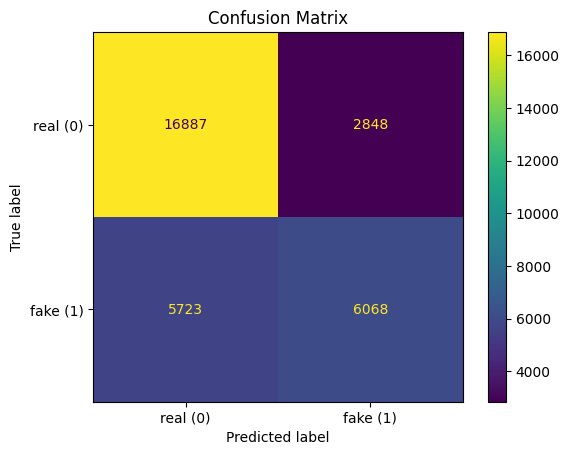

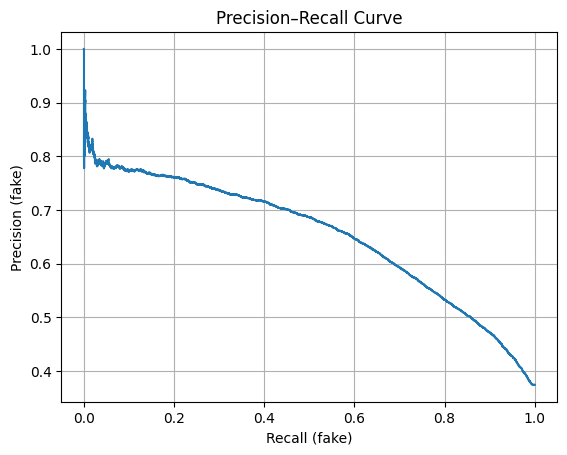

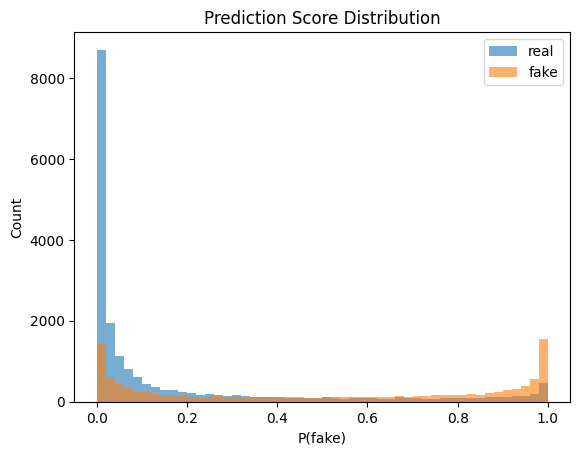

{'accuracy': 0.7281291632303496, 'precision': 0.680574248541947, 'recall': 0.5146298023916547, 'f1_macro': 0.6918366081375484, 'roc_auc': 0.768355930221822}


In [20]:
itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_20_128_256_128.parquet")
itw_data= pd.read_parquet(itw_test_data_path)
itw_data_no_std = itw_data.loc[:, ~itw_data.columns.str.contains("_std_")]
print(itw_data_no_std.columns)
itw_data_no_std.to_parquet(os.path.join(ITW_DATASET_PATH, 'normalized_features', "itw_features_no_std_20_128_256_128.parquet"))

metrics, metadata_extra = evaluate_model_on_parquet(pipeline_no_std, os.path.join(ITW_DATASET_PATH, 'normalized_features', "itw_features_no_std_20_128_256_128.parquet"), plots=True)
print(metrics)

### Train data only with min max features

In [21]:

train_data_path = os.path.join(DATASET_PATH_FEATURES, "training_minmax_features_20_128_256_128.parquet")
test_data_path = os.path.join(DATASET_PATH_FEATURES, "testing_minmax_features_20_128_256_128.parquet")

df_train = pd.read_parquet(train_data_path)
df_test = pd.read_parquet(test_data_path)

train_data_no_std_no_mean = df_train.loc[:, ~df_train.columns.str.contains("_std_")]
train_data_no_std_no_mean = train_data_no_std_no_mean.loc[:, ~train_data_no_std_no_mean.columns.str.contains("_mean_")]

print(train_data_no_std_no_mean.columns)
print('---------------------------------------')
test_data_no_std_no_mean = df_test.loc[:, ~df_test.columns.str.contains("_std_")]
test_data_no_std_no_mean = test_data_no_std_no_mean.loc[:, ~test_data_no_std_no_mean.columns.str.contains("_mean_")]

print(test_data_no_std_no_mean.columns)

train_data_no_std_no_mean.to_parquet(os.path.join(DATASET_PATH_FEATURES, "training_minmax_no_std_no_mean_features_20_128_256_128.parquet"))
test_data_no_std_no_mean.to_parquet(os.path.join(DATASET_PATH_FEATURES, "testing_minmax_no_std_no_mean_features_20_128_256_128.parquet"))



df = pd.read_parquet(os.path.join(DATASET_PATH_FEATURES, "training_minmax_no_std_no_mean_features_20_128_256_128.parquet"))
df_test = pd.read_parquet(os.path.join(DATASET_PATH_FEATURES, "testing_minmax_no_std_no_mean_features_20_128_256_128.parquet"))
#print(df.head())
print(df_test.head())
print(df_test.shape)
#df.shape()

lr_params = {
            "C": 1.0,  # Regularization strength
            "class_weight": None,  # Handle imbalanced classes
            "max_iter": 5000,  # Usually enough to converge
            "random_state": 42,
            "solver": "lbfgs",  # Good for small-medium datasets, handles binary classification well
            "penalty": "l2",  # Standard L2 regularization
        }

pipeline_no_std_no_mean, metrics_no_std_no_mean, lr_params_no_std_no_mean, feature_names_no_std_no_mean, metadata_extra_no_std_no_mean = train_and_evaluate_logistic_regression(os.path.join(DATASET_PATH_FEATURES, "training_minmax_no_std_no_mean_features_20_128_256_128.parquet"),
                                                                                                                                         os.path.join(DATASET_PATH_FEATURES, "testing_minmax_no_std_no_mean_features_20_128_256_128.parquet"),
                                                                                                                                         lr_params)

print(metrics_no_std_no_mean)

Index(['label', 'filename', 'mfcc_min_0', 'mfcc_min_1', 'mfcc_min_2',
       'mfcc_min_3', 'mfcc_min_4', 'mfcc_min_5', 'mfcc_min_6', 'mfcc_min_7',
       ...
       'mel_spectrogram_max_118', 'mel_spectrogram_max_119',
       'mel_spectrogram_max_120', 'mel_spectrogram_max_121',
       'mel_spectrogram_max_122', 'mel_spectrogram_max_123',
       'mel_spectrogram_max_124', 'mel_spectrogram_max_125',
       'mel_spectrogram_max_126', 'mel_spectrogram_max_127'],
      dtype='object', length=392)
---------------------------------------
Index(['label', 'filename', 'mfcc_min_0', 'mfcc_min_1', 'mfcc_min_2',
       'mfcc_min_3', 'mfcc_min_4', 'mfcc_min_5', 'mfcc_min_6', 'mfcc_min_7',
       ...
       'mel_spectrogram_max_118', 'mel_spectrogram_max_119',
       'mel_spectrogram_max_120', 'mel_spectrogram_max_121',
       'mel_spectrogram_max_122', 'mel_spectrogram_max_123',
       'mel_spectrogram_max_124', 'mel_spectrogram_max_125',
       'mel_spectrogram_max_126', 'mel_spectrogram_max_127']

Index(['label', 'filename', 'mfcc_min_0', 'mfcc_min_1', 'mfcc_min_2',
       'mfcc_min_3', 'mfcc_min_4', 'mfcc_min_5', 'mfcc_min_6', 'mfcc_min_7',
       ...
       'mel_spectrogram_max_118', 'mel_spectrogram_max_119',
       'mel_spectrogram_max_120', 'mel_spectrogram_max_121',
       'mel_spectrogram_max_122', 'mel_spectrogram_max_123',
       'mel_spectrogram_max_124', 'mel_spectrogram_max_125',
       'mel_spectrogram_max_126', 'mel_spectrogram_max_127'],
      dtype='object', length=392)


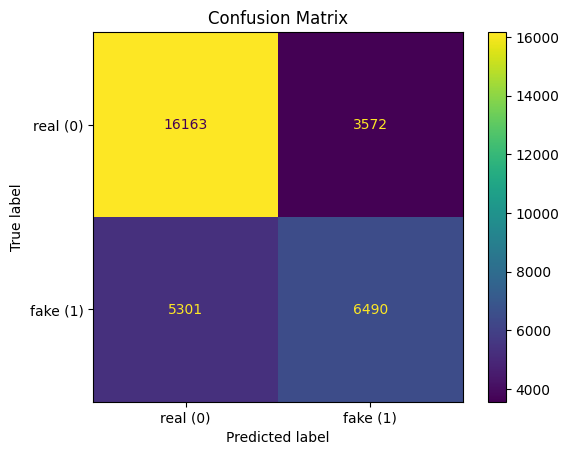

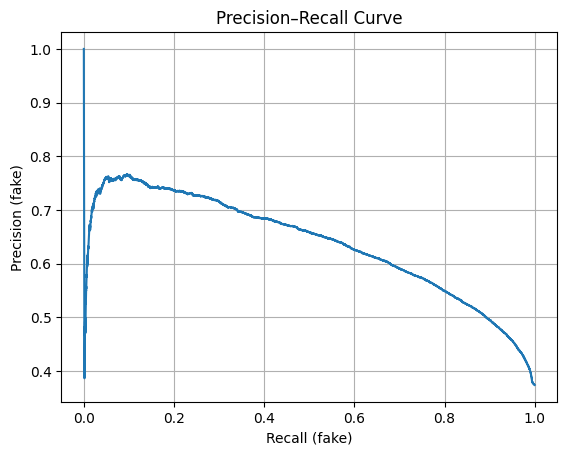

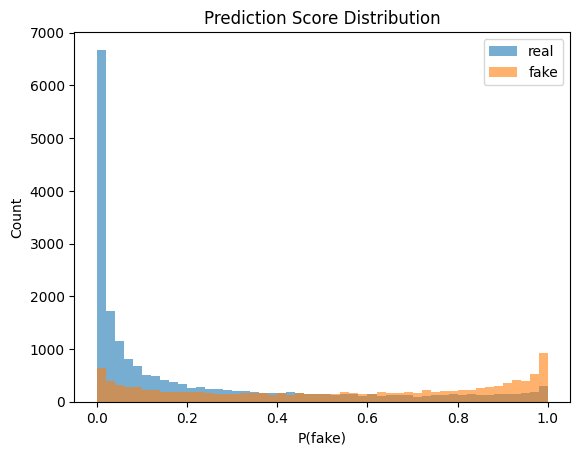

{'accuracy': 0.7185497684450929, 'precision': 0.6450009938382032, 'recall': 0.550419811720804, 'f1_macro': 0.6892997431950292, 'roc_auc': 0.7742159905749743}


In [22]:
itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_minmax_features_20_128_256_128.parquet")
itw_data= pd.read_parquet(itw_test_data_path)
itw_data_no_std_no_mean = itw_data.loc[:, ~itw_data.columns.str.contains("_std_")]
itw_data_no_std_no_mean = itw_data_no_std_no_mean.loc[:, ~itw_data_no_std_no_mean.columns.str.contains("_mean_")]

print(itw_data_no_std_no_mean.columns)
itw_data_no_std_no_mean.to_parquet(os.path.join(ITW_DATASET_PATH, 'normalized_features', "itw_minmax_no_std_no_mean_features_20_128_256_128.parquet"))

metrics, metadata_extra = evaluate_model_on_parquet(pipeline_no_std_no_mean, os.path.join(ITW_DATASET_PATH, 'normalized_features', "itw_minmax_no_std_no_mean_features_20_128_256_128.parquet"), plots=True)
print(metrics)